# On two ways to use determinantal point processes for Monte Carlo integration

##### See the [documentation](https://dppy.readthedocs.io/en/latest/continuous_dpps/multivariate_jacobi_ope.html) on ReadTheDocs or the [paper](https://negative-dependence-in-ml-workshop.lids.mit.edu/wp-content/uploads/sites/29/2019/06/icml_camera_ready.pdf) at ICML'19 workshop on Negative Dependence in ML

##### You can play with the different parameters :)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sampling" data-toc-modified-id="Sampling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sampling</a></span><ul class="toc-item"><li><span><a href="#Minimal-working-example" data-toc-modified-id="Minimal-working-example-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Minimal working example</a></span></li><li><span><a href="#Plot-a-sample-in-1D-or-2D" data-toc-modified-id="Plot-a-sample-in-1D-or-2D-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot a sample in 1D or 2D</a></span></li><li><span><a href="#Timing" data-toc-modified-id="Timing-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Timing</a></span></li><li><span><a href="#Gautschi-bounds" data-toc-modified-id="Gautschi-bounds-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Gautschi bounds</a></span></li></ul></li><li><span><a href="#Numerical-integration" data-toc-modified-id="Numerical-integration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Numerical integration</a></span><ul class="toc-item"><li><span><a href="#Estimators" data-toc-modified-id="Estimators-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Estimators</a></span></li><li><span><a href="#Integrands" data-toc-modified-id="Integrands-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Integrands</a></span></li><li><span><a href="#Estimation" data-toc-modified-id="Estimation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Estimation</a></span></li><li><span><a href="#Variance-decay" data-toc-modified-id="Variance-decay-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Variance decay</a></span><ul class="toc-item"><li><span><a href="#Of-an-integrand-$f$" data-toc-modified-id="Of-an-integrand-$f$-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Of an integrand $f$</a></span></li><li><span><a href="#$f(x)-=-\sum_{k=0}^{M-1}-\frac{1}{k+1}-P_k(x)$" data-toc-modified-id="$f(x)-=-\sum_{k=0}^{M-1}-\frac{1}{k+1}-P_k(x)$-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>$f(x) = \sum_{k=0}^{M-1} \frac{1}{k+1} P_k(x)$</a></span></li></ul></li></ul></li></ul></div>

# Imports

If you have not installed `DPPy` yet, you can install it with the following

In [1]:
# !pip install dppy

💣 **Note: to make sure you have the lastest version of the package please uncomment and run the following cell** 

In [2]:
# !rm -r DPPy
# !git clone https://github.com/guilgautier/DPPy.git
# !pip install scipy --upgrade
# !pip install DPPy/.

💣 If you have chosen to clone the repo and now wish to interact with the source code while running this notebook.
You can uncomment the following cell.

In [3]:
# %load_ext autoreload
# %autoreload 2
# import os
# import sys
# sys.path.insert(0, os.path.abspath('..'))

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

from scipy import stats
from scipy.integrate import quad

import multiprocessing as mp

from dppy.multivariate_jacobi_ope import MultivariateJacobiOPE

## Sampling

### Minimal working example

In [5]:
d, N = 2, 30  # dimension / number of points
jac_params = 0.5 - np.random.rand(d, 2)  # Jacobi ensemble parameters

dpp = MultivariateJacobiOPE(N, jac_params)
dpp.sample()

array([[ 0.56405707,  0.40969789],
       [-0.29666563,  0.49287862],
       [ 0.26691242, -0.95564641],
       [ 0.85451082, -0.81371604],
       [ 0.26295148, -0.63180672],
       [ 0.9904445 , -0.9547786 ],
       [ 0.20308387,  0.12568711],
       [ 0.52319194, -0.80870313],
       [-0.91238625,  0.48655278],
       [ 0.95580807, -0.15204606],
       [-0.93211181,  0.35491687],
       [-0.39380383,  0.85895049],
       [ 0.54770516, -0.30092732],
       [-0.74958598,  0.98289479],
       [-0.57653413, -0.01752669],
       [-0.64334164,  0.79860102],
       [-0.02636582,  0.99399368],
       [ 0.99459445, -0.08203474],
       [ 0.13938026,  0.7979314 ],
       [ 0.97479006,  0.45967426],
       [ 0.99998767,  0.83853753],
       [ 0.50642053,  0.90539765],
       [ 0.78422053, -0.49979802],
       [ 0.67672032,  0.704662  ],
       [-0.91390362, -0.90480144],
       [-0.18170915, -0.87188171],
       [ 0.9570216 ,  0.98122928],
       [ 0.64503525, -0.96054185],
       [-0.92824236,

### Plot a sample in 1D or 2D

Display 300 points in 1D
with parameters i.i.d. uniformly on [-1/2, 1/2]^1
[[ 0.43891979 -0.17077171]]
Display 300 points in 2D
with parameters i.i.d. uniformly on [-1/2, 1/2]^2
[[ 0.32936587 -0.29822154]
 [ 0.04672468  0.33566846]]


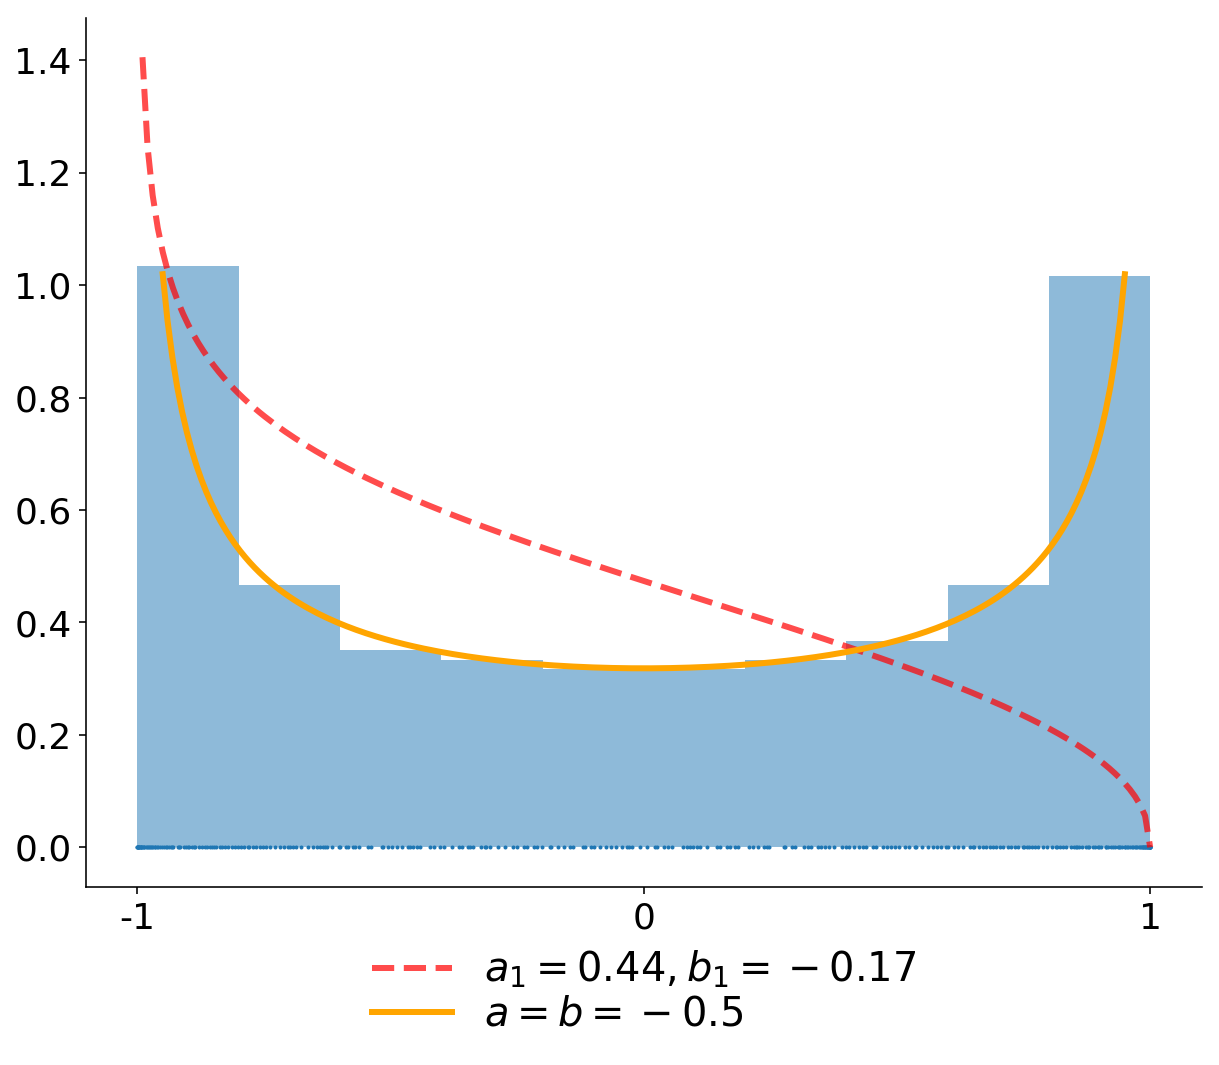

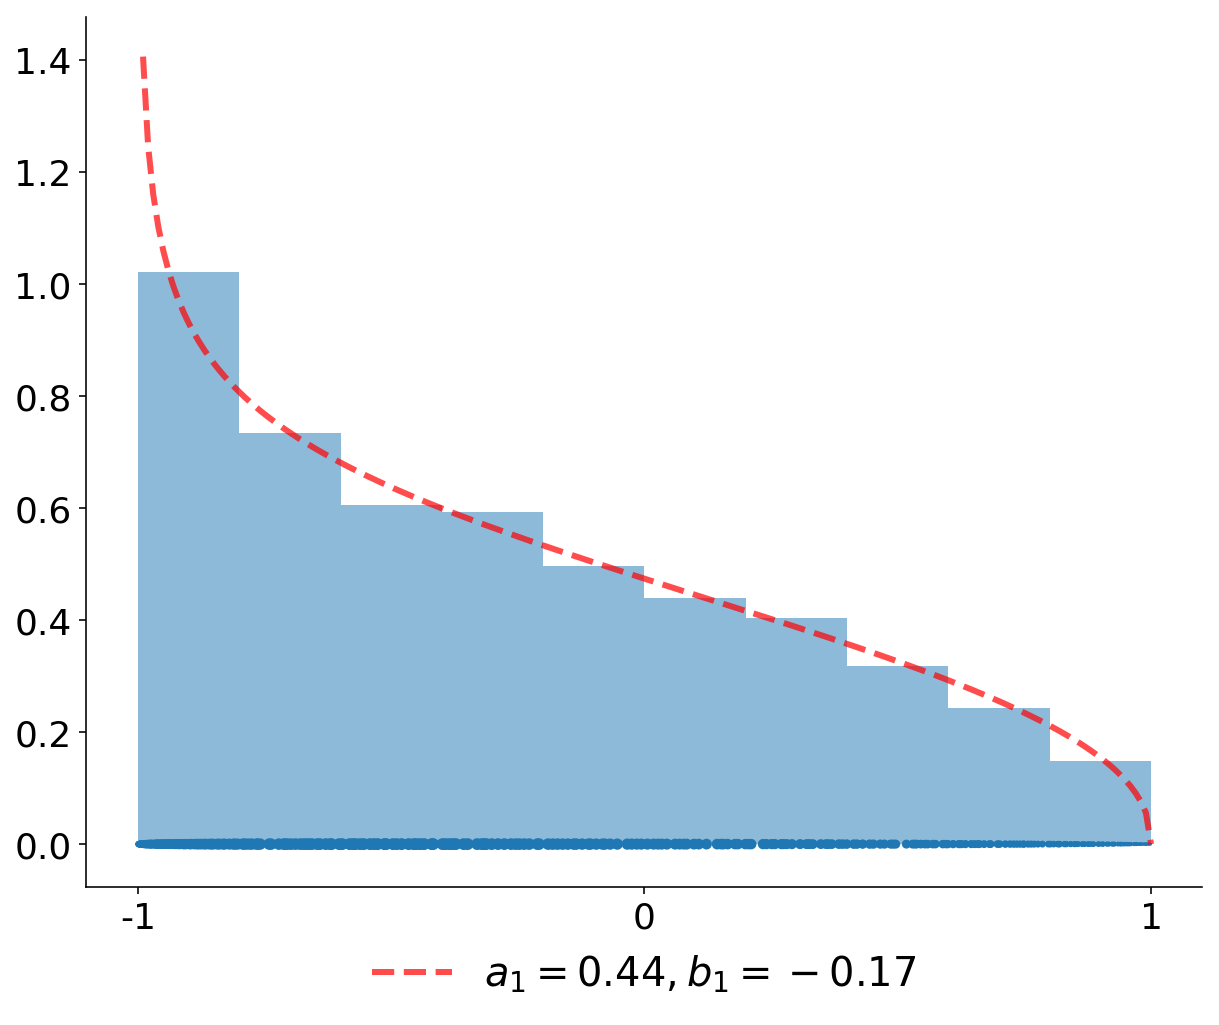

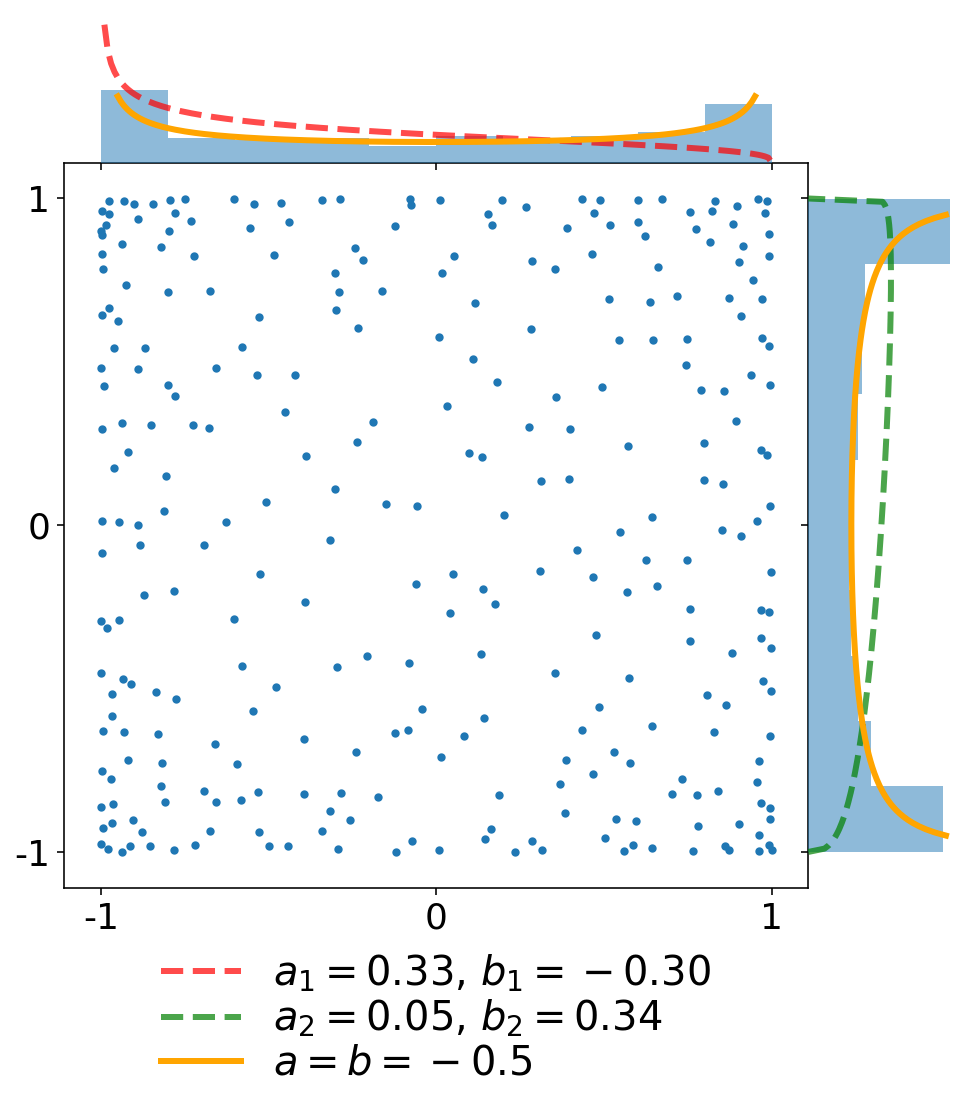

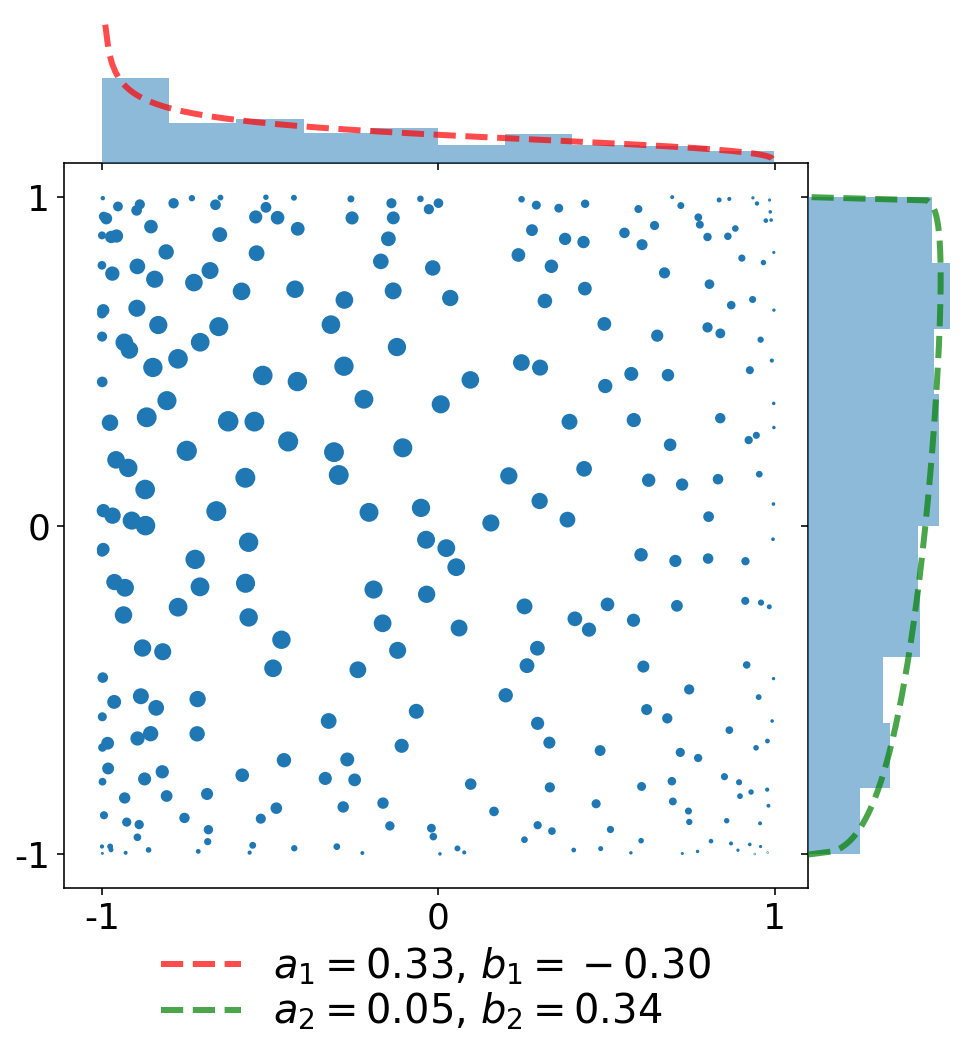

In [6]:
N = 300

for d in (1, 2):
    
    jac_params = 0.5 - np.random.rand(d, 2)

    dpp = MultivariateJacobiOPE(N, jac_params)

    sampl = dpp.sample()

    print('\n'.join(['Display {} points in {}D'.format(dpp.N, dpp.dim),
                     'with parameters i.i.d. uniformly on [-1/2, 1/2]^{}'.format(dpp.dim),
                     '{}'.format(jac_params)]))
    
    dpp.plot(weighted=False)
    dpp.plot(weighted=True)

In [7]:
print('\n'.join(['Display {} points in {}D'.format(dpp.N, dpp.dim),
                 'with parameters i.i.d. uniformly on [-1/2, 1/2]^{}'.format(dpp.dim),
                 '{}'.format(jac_params)]))

Display 300 points in 2D
with parameters i.i.d. uniformly on [-1/2, 1/2]^2
[[ 0.32936587 -0.29822154]
 [ 0.04672468  0.33566846]]


### Timing

To get a quick idea of the time to get a sample you can run the following cell

In [8]:
d, N = 2, 100
jac_params = 0.5 - np.random.rand(d, 2)
# jac_params = -0.5 * np.ones((d, 2))

dpp = MultivariateJacobiOPE(N, jac_params)

%timeit dpp.sample()

235 ms ± 60.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Gautschi bounds

In the current implementation of the chain rule, the proposal density is $\frac{1}{N} K(x,x) w(x)$ and not $\prod_{i=1}^d \frac{1}{\pi\sqrt{1-(x^i)^2}}$ as previously used by [BaHa16] (see also [their implementation](https://github.com/rbardenet/dppmc) and recycled in our [ICML'19 workshop paper](http://negative-dependence-in-ml-workshop.lids.mit.edu/wp-content/uploads/sites/29/2019/06/icml_camera_ready.pdf)!

However, to sample from $\frac{1}{N} K(x,x) w(x)$ we use a rejection sampling mechanism with proposal $\frac{1}{\pi^d} \omega_{eq}(x)$ where $\omega_{eq}(x)=\prod_{i=1}^d \frac{1}{\sqrt{1-(x^i)^2}} = \prod_{i=1}^{d} [(1-x^i)(1+x^i)]^{-1/2}$ 

So that the ratio target/proposal writes
$$
\begin{align}
        \frac{1}{N} K(x,x) w(x)
            \frac{1}{\frac{w_{\text{eq}}(x)}{\pi^d}}
        &= \frac{\pi^d}{N} \frac{K(x,x) w(x)}{w_{\text{eq}}(x)}\\
        &= \frac{1}{N}
            \sum_{\mathfrak{b}(k)=0}^{N-1}
                \prod_{i=1}^{d}
                    \pi
                    (1 - x^i)^{a_i + \frac12}
                    (1 + x^i)^{b_i + \frac12}
                    \frac{P_{k_i}^{(a_i, b_i)}(x^i)^2}
                         {\|P_{k_i}^{(a_i, b_i)}\|^2}\\
        &\leq \frac{\text{Gautschi bound}}{N}
\end{align}
$$

In [9]:
dim_max = 20
rang_dim = [1, 5, 10, 15]  #np.arange(1, 4+1)

N_start, N_max, N_step = 50, 200, 50
rang_N = [n for n in range(N_start, N_max+1, N_step)]

rej_bounds = np.zeros((3, len(rang_dim), len(rang_N)))

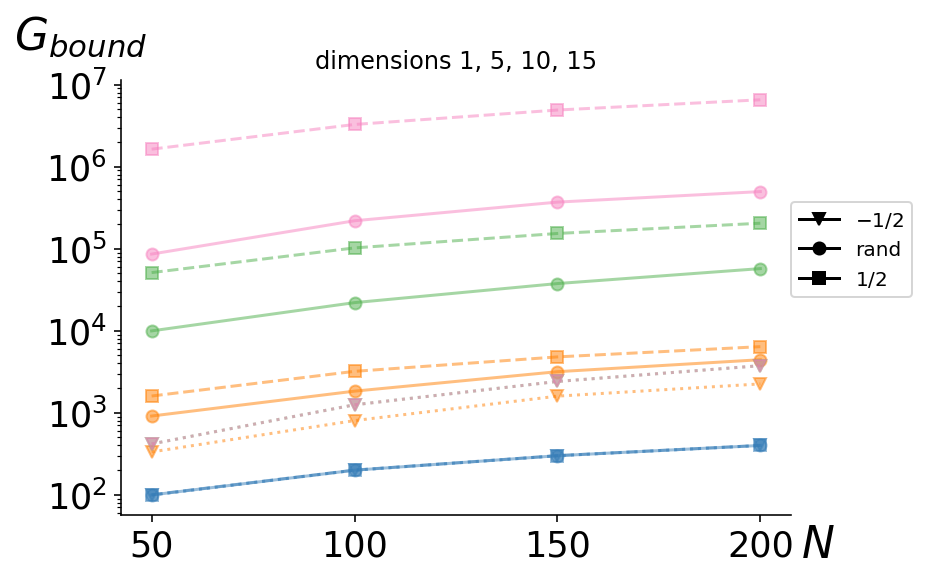

In [10]:
CB_cols = ['#377eb8', '#ff7f00', '#4daf4a',
           '#f781bf', '#a65628', '#984ea3',
           '#999999', '#e41a1c', '#dede00']

fig, ax = plt.subplots()
plt.title('dimensions '+', '.join([str(d) for d in rang_dim]))

for d, dim in enumerate(rang_dim):
    
    jac_par_list = [-0.5*np.ones((dim, 2)),
                    0.5-np.random.rand(dim, 2),
                    0.5*np.ones((dim, 2))]
    labels = [r'$-1/2$', 'rand', r'$1/2$']
    markers = ['v', 'o', 's']
    l_style = [':', '-', '--']
    
    for jac_par, m, ls in zip(jac_par_list, markers, l_style):

#         print(jac_par)
        ax.semilogy(rang_N,
                    [MultivariateJacobiOPE(N, jac_par).Gautschi_bound
                         for N in rang_N],
                    marker=m,
                    ls=ls,
                    c=CB_cols[d],
                    alpha=0.5
                    )

ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())

ax.plot([0, 0], [1, 0], label=labels[0], marker=markers[0],
        ls='-',
        c='k')  
ax.plot([0, 0], [1, 0], label=labels[1], marker=markers[1],
        ls='-',
        c='k')
ax.plot([0, 0], [1, 0], label=labels[2], marker=markers[2],
        ls='-',
        c='k')

# ax.set_xlim([49, 212])
ax.set_xlabel(r'$N$', fontsize=22)
ax.xaxis.set_label_coords(1.04, -0.02)
ax.set_ylabel(r'$G_{bound}$', fontsize=22, rotation='horizontal')
ax.yaxis.set_label_coords(-0.06, 1.05)

ax.tick_params(axis = 'both', which = 'major', labelsize = 17.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc=(1.0, 0.5))
plt.show()

## Numerical integration

### Estimators

In [11]:
def BH_estimator(integrand, dpp, sample=None):
    
    if sample is not None:
        return np.sum(integrand(sample).ravel() / dpp.K(sample))
    
    else:
        sample = dpp.sample()
        return BH_estimator(integrand, dpp, sample)

def EZ_estimator(integrand, dpp, sample=None):

    if sample is not None:
        
        phi_x = dpp.eval_poly_multiD(sample, normalize='norm')
        integrand_x = integrand(sample).ravel()

        EZ_estimator = np.linalg.solve(phi_x, integrand_x)[0]
        EZ_estimator *= np.sqrt(dpp.mass_of_mu)
        
        return EZ_estimator#, np.linalg.cond(phi_sample)

    else:
        
        sample = dpp.sample()
        return EZ_estimator(integrand, dpp, sample)

def both_estimators(integrand, dpp, sample=None):
    
    if sample is not None:
        return BH_estimator(integrand, dpp, sample), EZ_estimator(integrand, dpp, sample)
    
    else:
        np.random.seed(None)
        sample = dpp.sample()
        return both_estimators(integrand, dpp, sample)

### Integrands

In [12]:
def bump_eps(X, eps=0.05):
    """ https://en.wikipedia.org/wiki/Bump_function
    """

    if type(X) is float:
        f_x = np.exp(-1 / (1.0 - eps - X**2)) if abs(X) < 1 - eps else 0.
        
    elif X.ndim == 1:
        in_I = np.abs(X) < 1 - eps
        f_x = np.zeros(in_I.size)
        f_x[in_I] = np.exp(-1 / (1.0 - eps - X[in_I]**2))

    else:
        in_I = np.all(np.abs(X) < 1 - eps, axis=1)
        f_x = np.zeros(in_I.size)
        f_x[in_I] = np.exp(-np.sum(1.0 / (1.0 - eps - X[in_I]**2), axis=1))
    
    return f_x

def sine(X):

    if type(X) is float: 
        f_x = np.sin(np.pi*X)
    elif X.ndim == 1:
        f_x = np.sin(np.pi*X)
    else:
        f_x = np.prod(np.sin(np.pi*X), axis=-1)
    
    return f_x

def cosine(X):

    if type(X) is float: 
        f_x = np.cos(np.pi*X)
    elif X.ndim == 1:
        f_x = np.cos(np.pi*X)
    else:
        f_x = np.prod(np.cos(np.pi*X), axis=-1)
    
    return f_x

def absolute(X):
    if type(X) is float: 
        f_x = np.abs(X)
    elif X.ndim == 1:
        f_x = np.abs(X)
    else:
        f_x = np.prod(np.abs(X), axis=-1)
    
    return f_x

def heaviside(X, shift=0):
    
    if type(X) is float: 
        f_x = np.heaviside(X - shift, 0)
    elif X.ndim == 1:
        f_x = np.heaviside(X - shift, 0)
    else:
        f_x = np.prod(np.heaviside(X - shift, 0), axis=-1)
    
    return f_x

def mix(X):
    
    return 0.5 * (heaviside(X) - 0.5) * (cosine(X) + cosine(2*X) + sine(5*X))

### Estimation

In [13]:
def integrand(x):
    return bump_eps(x, eps=0.05)
#     return cosine(x)
#     return 2 * (heaviside(x) - 0.5)
#     return absolute(x)
#     return mix(x)

In [14]:
d, N = 1, 30

jac_params = -0.5 + np.random.rand(d, 2)
# jac_params = -0.5*np.ones((d, 2))

dpp = MultivariateJacobiOPE(N, jac_params)

Estimation of the integral

BH
0.4077196623319416
EZ
0.39096000690877236
scipy quad
0.3909523124934768
numpy trapz
0.39095231249324747


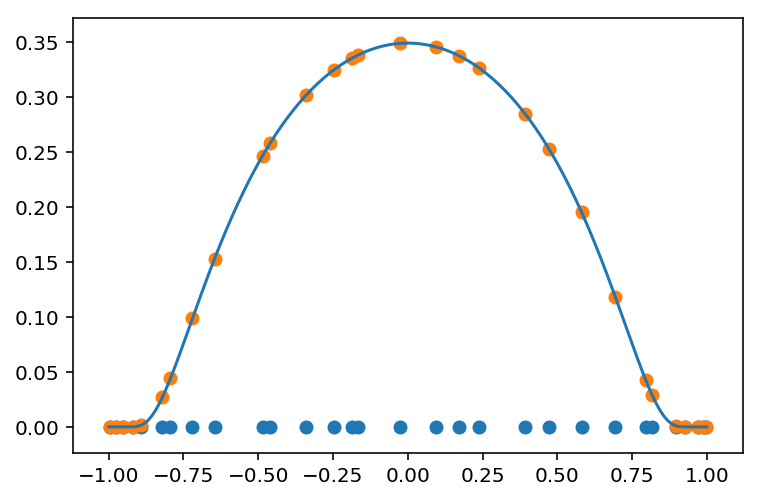

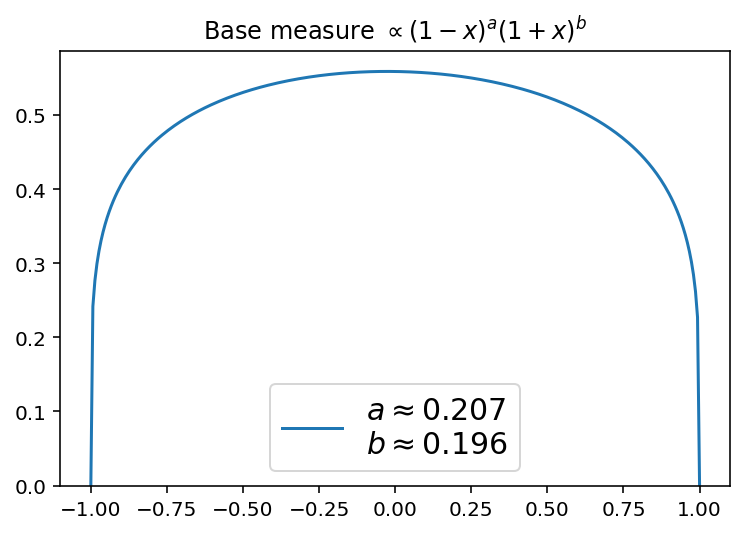

In [15]:
sampl = dpp.sample()

print('Estimation of the integral\n')
for lab, est in zip(['BH', 'EZ'], both_estimators(integrand, dpp, sampl)):
    print(lab)
    print(est)
    
if d == 1:
    
    print('scipy quad')
    print(quad(lambda x: dpp.eval_w(x)*integrand(x), 
               -1, 1)[0])

    tol = 1e-4
    X_ = np.linspace(-1 + tol, 1 - tol, 300)[:, None]

    print('numpy trapz')
    print(np.trapz(dpp.eval_w(X_)*integrand(X_),
                   X_.ravel()))
    
    
    tols = np.zeros_like(dpp.jacobi_params)
    tols[tols < 0] = 5e-2
    X_ = np.linspace(-1 + tols[0, 1], 1 - tols[0, 0], 300)[:, None]
    fig, ax = plt.subplots()
    ax.plot(X_, integrand(X_), label='f')
    ax.scatter(sampl, np.zeros_like(sampl), label='sample')
    ax.scatter(sampl, integrand(sampl), label='f(sample)')
    
    plt.figure()
    plt.title(r'Base measure $\propto (1-x)^a (1+x)^b$')
    plt.plot(X_, 0.5*stats.beta(*(1+jac_params[0])).pdf(0.5*(1-X_)),
             label='\n'.join([r'$a \approx {:1.3f}$'.format(jac_params[0, 0]),
                              r'$b \approx {:1.3f}$'.format(jac_params[0, 1])]))
    plt.ylim(bottom=0)
    plt.legend(fontsize=15, loc='best')

###  Variance decay

##### To repeat the estimations, we use the package `multiprocessing` 
##### In this notebook, to estimate the variance of both BH and EZ estimators,
##### we draw $20$ samples with up to $N=100$ points for $d=1,2$ (by default)
##### You can change the parameters, but sampling may take some time

#### Of an integrand $f$

In [16]:
def integrand(x):
    return bump_eps(x, eps=0.05)
#     return cosine(x)
#     return 2 * (heaviside(x) - 0.5)
#     return absolute(x)
#     return mix(x)

In [17]:
dim_max = 2
nb_repeats = 20

var_results = dict()

for d in range(1, dim_max+1):
    print('dimension =', d)
    
    jac_params = -0.5 + np.random.rand(d, 2)
    jac_params[0, :] = -0.5
    if d == 1:
        N_min, N_max, N_step = 20, 100, 20
    else:
        N_min, N_max, N_step = 20, 100, 20
    
    var_results[(d,)] = jac_params
    
    for N in range(N_min, N_max+1, N_step):
        print('#points =', N)

        dpp = MultivariateJacobiOPE(N, jac_params)

        pool = mp.Pool(mp.cpu_count())

        results = pool.starmap(both_estimators, [(integrand, dpp) for _ in range(nb_repeats)])
        results = np.array(results)
        var_results[(d, N)] = np.var(results, axis=0)

        pool.close()

dimension = 1
#points = 20
#points = 40
#points = 60
#points = 80
#points = 100
dimension = 2
#points = 20
#points = 40
#points = 60
#points = 80
#points = 100


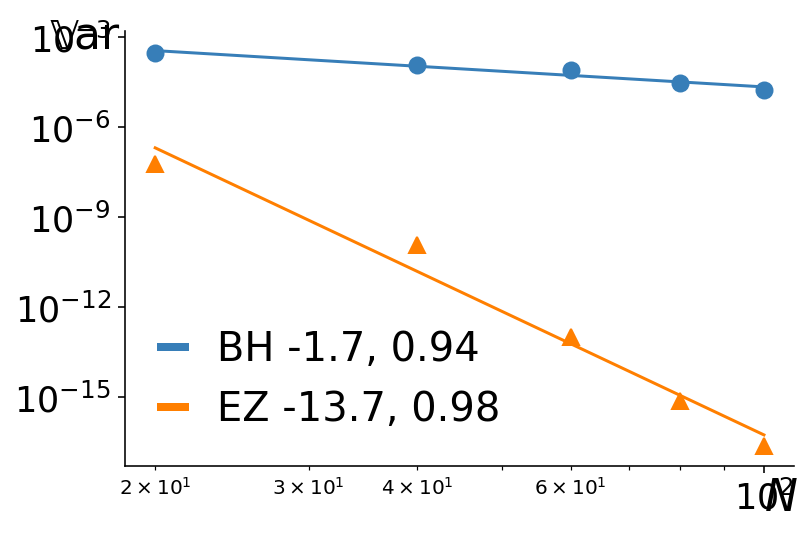

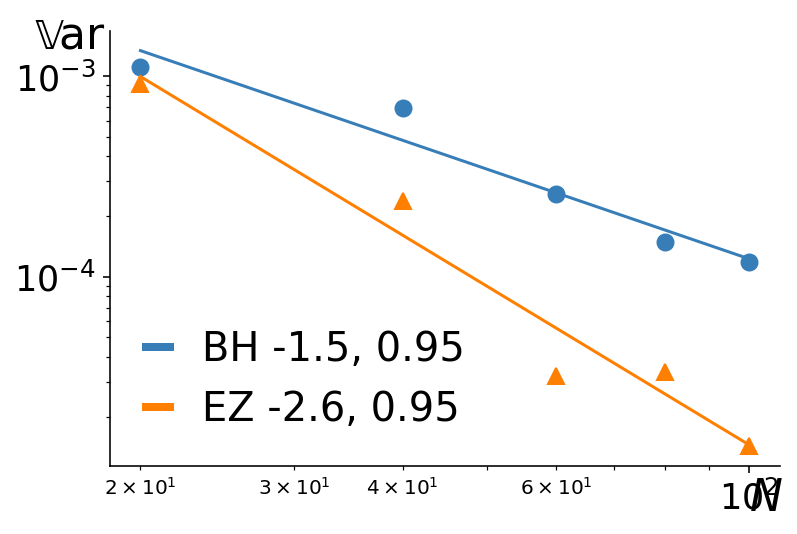

In [18]:
j_par = {d: var_results.get((d, )) for d in range(1, dim_max + 1)}
var_N = {d: np.array([key[1] for key in var_results.keys() if len(key)==2 and key[0]==d])
            for d in range(1, dim_max + 1)}
var_res = {d: np.array([value for key, value in var_results.items() if len(key)==2 and key[0]==d]).T
            for d in range(1, dim_max + 1)}

cols = ['blue', 'green']
CB_cols = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
markers = ['o', '^']
labels = ['BH', 'EZ']
for d in range(1, dim_max + 1):
    
    fig, ax = plt.subplots()
#     plt.title(r'Dimension $d={}$'.format(d), fontsize=20)
    ax.set_xlabel(r'$N$', fontsize=22)
    ax.xaxis.set_label_coords(0.98, -0.025)
    ax.set_ylabel(r'$\mathrm{\mathbb{V}}$ar', fontsize=22, rotation='horizontal')
    ax.yaxis.set_label_coords(-0.06, 0.94)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 17.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    for c, m, lab, var_estim in zip(CB_cols[:2], markers, labels, var_res[d]):

        ax.loglog(var_N[d], var_estim, m, c=c, markersize=8)

        x_plot = np.array([np.min(var_N[d]), np.max(var_N[d])])
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(var_N[d]), np.log(var_estim))
        lab += r' {:.1f}, {:.2f}'.format(slope, r_value**2)
        
        ax.loglog(x_plot, np.exp(intercept)*x_plot**slope, c=c, label=lab)
    
    leg = ax.legend(fontsize=20, frameon=False, handlelength=0.6, loc='lower left')

    for line in leg.get_lines():
        line.set_linewidth(4.0)

    plt.show()

#### $f(x) = \sum_{k=0}^{M-1} \frac{1}{k+1} P_k(x)$

$M=70$

EZ provides perfect estimation when $N\geq M$, see the drop in the variance plot

In [19]:
dim_max = 2
nb_repeats = 20

M = 70
N_min, N_max, N_step = 10, 100, 10

var_results = dict()

for d in range(1, dim_max+1):
    print('dimension =', d)
    
    jac_params = -0.5 + np.random.rand(d, 2)
    jac_params[0, :] = -0.5
    
    dpp_gp = MultivariateJacobiOPE(M, jac_params)
    coefs = 1.0 / np.arange(1, dpp_gp.N + 1)
    
    def f_gp(X):
        return np.sum(coefs*dpp_gp.eval_poly_multiD(X, normalize='norm'), axis=-1)

    var_results[(d, )] = jac_params
    
    for N in range(N_min, N_max+1, N_step):
        print('#points =', N)

        dpp = MultivariateJacobiOPE(N, jac_params)

        pool = mp.Pool(mp.cpu_count())

        results = pool.starmap(both_estimators, [(f_gp, dpp) for _ in range(nb_repeats)])
        results = np.array(results)
        var_results[(d, N)] = np.var(results, axis=0)

        pool.close()

dimension = 1
#points = 10
#points = 20
#points = 30
#points = 40
#points = 50
#points = 60
#points = 70
#points = 80
#points = 90
#points = 100
dimension = 2
#points = 10
#points = 20
#points = 30
#points = 40
#points = 50
#points = 60
#points = 70
#points = 80
#points = 90
#points = 100


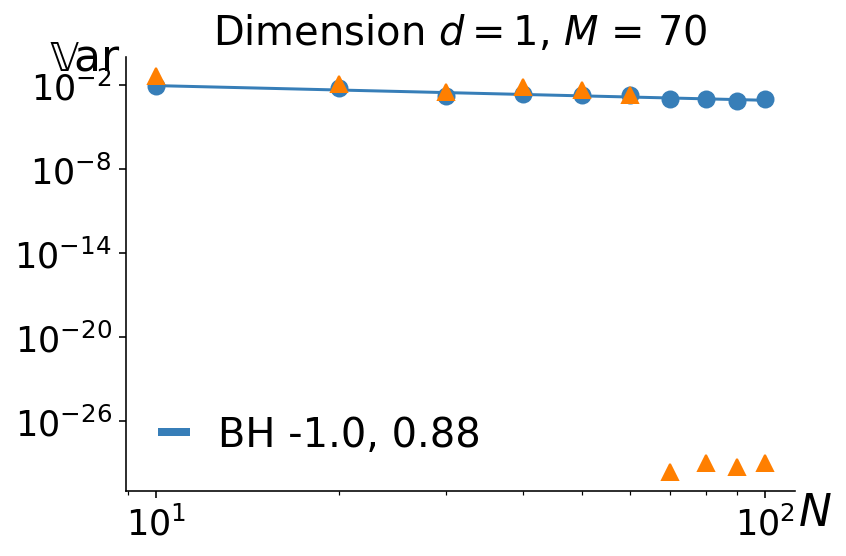

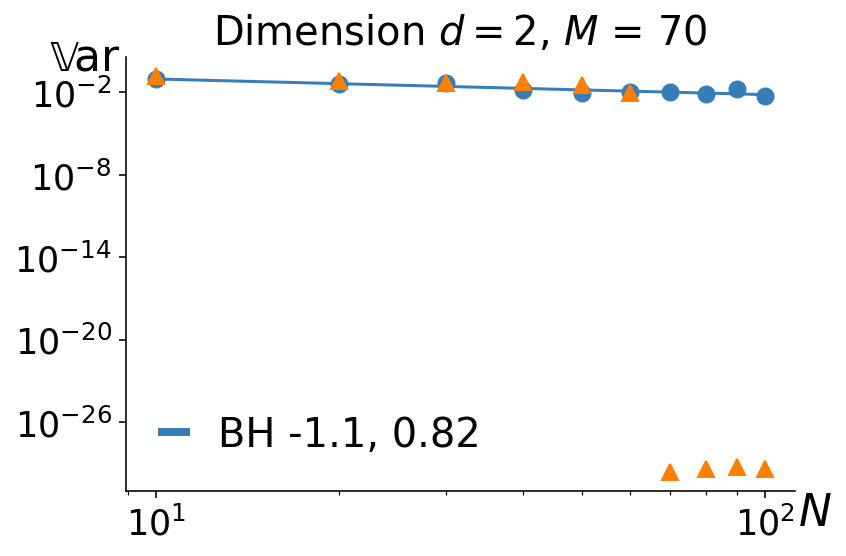

In [20]:
j_par = {d: var_results.get((d, )) for d in range(1, dim_max + 1)}
var_N = {d: np.array([key[1] for key in var_results.keys() if len(key)==2 and key[0]==d])
            for d in range(1, dim_max + 1)}
var_res = {d: np.array([value for key, value in var_results.items() if len(key)==2 and key[0]==d]).T
            for d in range(1, dim_max + 1)}


CB_cols = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
markers = ['o', '^']
labels = ['BH', 'EZ']
for d in range(1, dim_max + 1):
    
    fig, ax = plt.subplots()
    plt.title(r'Dimension $d={}$, $M$ = {}'.format(d, M), fontsize=20)
    ax.set_xlabel(r'$N$', fontsize=22)
    ax.xaxis.set_label_coords(1.03, -0.0)
    ax.set_ylabel(r'$\mathrm{\mathbb{V}}$ar', fontsize=22, rotation='horizontal')
    ax.yaxis.set_label_coords(-0.06, 0.95)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 17.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)


    for c, m, lab, var_estim in zip(CB_cols[:2], markers, labels, var_res[d]):

        ax.loglog(var_N[d], var_estim, m, c=c, markersize=8)

        x_plot = np.array([np.min(var_N[d]), np.max(var_N[d])])
        
        if lab == 'BH':
            slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(var_N[d]), np.log(var_estim))
            lab += r' {:.1f}, {:.2f}'.format(slope, r_value**2)
        
            ax.loglog(x_plot, np.exp(intercept)*x_plot**slope, c=c, label=lab)
        
    leg = ax.legend(fontsize=20, frameon=False, handlelength=0.6, loc='lower left')

    for line in leg.get_lines():
        line.set_linewidth(4.0)
        
    plt.show()